In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
#import and read csv
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding = "ISO-8859-1")
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
# rename columns
df.columns = ['PMID/PMCID', 'Publisher', 'Journal_Title', 'Article_Title', 'Cost']
df.describe()

,PMID/PMCID,Publisher,Journal_Title,Article_Title,Cost
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,Not yet available,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


In [4]:
df.head()

,PMID/PMCID,Publisher,Journal_Title,Article_Title,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID       1928 non-null object
Publisher        2127 non-null object
Journal_Title    2126 non-null object
Article_Title    2127 non-null object
Cost             2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


In [6]:
# strip cost column of monetary identifiers and turn column into a decimal for further research
df['Cost'] = df['Cost'].replace({'\£':'','\$':''}, regex = True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID       1928 non-null object
Publisher        2127 non-null object
Journal_Title    2126 non-null object
Article_Title    2127 non-null object
Cost             2127 non-null float64
dtypes: float64(1), object(4)
memory usage: 83.2+ KB


In [7]:
# cleaning textual data
df['Journal_Title'] = df['Journal_Title'].str.lower() # convert all characters to lowercase
df['Journal_Title'] = df['Journal_Title'].str.replace('@', 'at') # replace characters
df['Journal_Title'] = df['Journal_Title'].str.replace('1', 'one') # replace characters
df['Journal_Title'] = df['Journal_Title'].str.replace('the ', '') # replace characters
df['Journal_Title'] = df['Journal_Title'].str.replace('j ', 'journal') # replace characters
df['Journal_Title'] = df['Journal_Title'].str.replace('jnl', 'journal') # replace characters
df['Journal_Title'] = df['Journal_Title'].str.replace('nucleic acid research', 'nucleic acids research') # replace characters
df['Journal_Title'] = df['Journal_Title'].str.replace('plosone', 'plos one') # replace characters
df['Journal_Title'] = df['Journal_Title'].str.replace('pnas', 'proceedings of national academy of sciences') # replace characters
df['Journal_Title'] = df['Journal_Title'].str.replace('proceedings of national academy of sciences of united states of america', 'proceedings of national academy of sciences') # replace characters
df['Journal_Title'] = df['Journal_Title'].str.split(':').str[0] # split strings at : and only keep characters before cplit
df['Journal_Title'] = df['Journal_Title'].str.strip() # strip whitespace before and after characters
df['Publisher'] = df['Publisher'].str.lower() # convert all characters to lowercase
df['Publisher'] = df['Publisher'].str.strip() # strip whitespace before and after characters
df['Publisher'] = df['Publisher'].str.replace('oup', 'oxford university press') # replace characters
df['Publisher'] = df['Publisher'].str.replace('univ', 'university') # replace characters
df['Publisher'] = df['Publisher'].str.replace('plos', 'public library of science') # replace characters
df['Publisher'] = df['Publisher'].str.replace('&', 'and') # replace characters
df['Publisher'] = df['Publisher'].str.replace('-', ' ') # replace characters
journals = df.groupby('Journal_Title')['Article_Title'].nunique()
print(journals.nlargest(5))

Journal_Title
plos one                                       205
journal of biological chemistry                 60
neuroimage                                      34
proceedings of national academy of sciences     31
nucleic acids research                          29
Name: Article_Title, dtype: int64


#### 1) Find the 5  most common journals and the number of articles for each

In [8]:
journals = df.groupby('Journal_Title')['Article_Title'].nunique()
print(journals.nlargest(5))

Journal_Title
plos one                                       205
journal of biological chemistry                 60
neuroimage                                      34
proceedings of national academy of sciences     31
nucleic acids research                          29
Name: Article_Title, dtype: int64


In [9]:
# check to see if any values in cost column are null
df['Cost'].isnull().values.any()

False

In [10]:
money = df['Cost']
money.describe()

count      2127.000000
mean      24067.339972
std      146860.665559
min           0.000000
25%        1280.000000
50%        1884.010000
75%        2321.305000
max      999999.000000
Name: Cost, dtype: float64

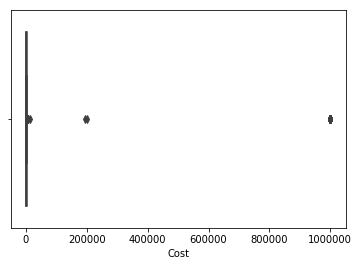

In [11]:
# visualize outliers in cost column
sns.boxplot(x=df['Cost'])
plt.show()

In [12]:
# find the mean and std of the journal cost after visualizing outliers
from numpy import mean
from numpy import std
print('mean=%.3f stdv=%.3f' % (mean(df['Cost']), std(df['Cost'])))

mean=24067.340 stdv=146826.139


In [13]:
# filter the dataframe to examine journal costs above 20,000
filter_cost = df[df['Cost'] > 20000]

In [14]:
#print filtered costs
filter_cost

,PMID/PMCID,Publisher,Journal_Title,Article_Title,Cost
149,PMC3234811,asbmb,journal of biological chemistry,Picomolar nitric oxide signals from central ne...,999999.0
227,3708772,biomed central,bmc genomics.,"Phenotypic, genomic, and transcriptional chara...",999999.0
277,PMC3668259,bmc,trials,Community resource centres to improve the heal...,999999.0
358,PMC3219211,cambridge universityersity press,expert reviews in molecular medicine,Pharmacological targets in the ubiquitin syste...,999999.0
404,PMC3533396,company of biologists,journal of cell science,PKA isoforms coordinate mRNA fate during nutri...,999999.0
410,NaN,cup,journal of international african institute,"Pharmacy, money and public health in Dakar.",999999.0
491,PMCID: PMC3464430,elsevier,cell,piRNAs can trigger a multigenerational epigene...,999999.0
560,PMC3632754,elsevier,experimental cell research,Perturbation of invadolysin disrupts cell migr...,999999.0
630,Epub ahead of print April 2013 - print in press,elsevier,journal of paediatric urology,Persistent unexplained congenital clitoromegal...,999999.0
660,PMID:23291342 PMC3581773,elsevier,molecluar & cellular endocrinology,Periconceptional changes in maternal exposure ...,999999.0


In [15]:
# drop rows where cost is greater than 20,000
df.drop(df[(df.Cost > 20000.0)].index, inplace=True)
df.describe()

,Cost
count,2078.000000
mean,1827.531338
std,807.078963
min,0.000000
25%,1268.700000
50%,1851.650000
75%,2302.730000
max,13200.000000


In [16]:
# check to see if any values in the cost column are null
df['Cost'].isnull().sum().sum()

0

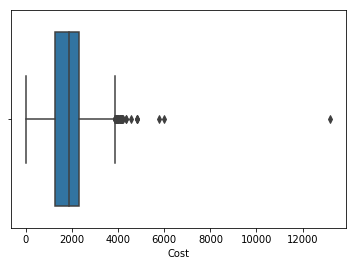

In [17]:
# visualize outliers after removing obvious outliers
sns.boxplot(x=df['Cost'])
plt.show()

In [18]:
# get statistics on all cost data
df.describe()

,Cost
count,2078.000000
mean,1827.531338
std,807.078963
min,0.000000
25%,1268.700000
50%,1851.650000
75%,2302.730000
max,13200.000000


In [19]:
# group journals by journal title and get statistical information on the journal names
journal_group = df.groupby('Journal_Title').Cost.agg(['count', 'mean', 'median', 'std'])
journal_group.describe()

,count,mean,median,std
count,851.000000,851.000000,851.000000,314.000000
mean,2.440658,1895.072440,1902.795787,272.423262
std,7.549659,688.078035,701.818555,292.279107
min,1.000000,9.930000,9.930000,0.000000
25%,1.000000,1470.470000,1460.800000,42.426407
50%,1.000000,1970.570000,1977.720000,189.030379
75%,2.000000,2302.930000,2316.400000,387.458887
max,197.000000,6000.000000,6000.000000,1702.262322


#### 1) Find the 5  most common journals and the number of articles for each

In [20]:
journals = df.groupby('Journal_Title')['Article_Title'].nunique()
print(journals.nlargest(5))

Journal_Title
plos one                                       196
journal of biological chemistry                 59
neuroimage                                      34
proceedings of national academy of sciences     30
nucleic acids research                          29
Name: Article_Title, dtype: int64


#### 2) Find the Mean, Median, and STD of cost of top 5 Journals

In [21]:
print((journal_group.sort_values(by='count', ascending=False)).head())

                                             count         mean    median  \
Journal_Title                                                               
plos one                                       197   935.410964   896.990   
journal of biological chemistry                 59  1415.877119  1314.530   
neuroimage                                      34  2050.756176  2289.245   
proceedings of national academy of sciences     30   777.585333   728.825   
nucleic acids research                          29  1162.344828   852.000   

                                                    std  
Journal_Title                                            
plos one                                     195.369314  
journal of biological chemistry              389.441789  
neuroimage                                   472.211498  
proceedings of national academy of sciences  404.488598  
nucleic acids research                       442.150934  
